# Matplotlib

In th first part of this tutorial, we will work with a data set in "mtcars.csv" that contains information on 31 cars.  We will create a collection of scatterplots showing the relationship between horsepower (hp) and miles per gallon (mpg), displacement(disp) and quarter mile time (qsec).  Also, in each of these plots we will distinguish between automatic (am = 0) and manual (am=1) cars. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#Read in data frame - Note the new style "bmh"
plt.style.use("ggplot")
#matplotlib.use("nbagg")
df_cars = pd.read_csv("Data/mtcars.csv")
#I am sorting so I can slice out the automatic and manual calls.
df_cars_sorted = df_cars.sort_values(by="am").reset_index(drop = True)
df_cars_sorted

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
1,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
2,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
3,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
4,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
5,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
6,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
7,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
8,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
9,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4


In [2]:
#Get automatic (am=0) versus manual (am=1) cars.  We will see a faster way to do this using SQL.
df_cars_auto = df_cars_sorted.loc[0:18,:]
df_cars_man = df_cars_sorted.loc[19:,:]


Let's first create a 1x3 figure on which we will place the three plots.  Here are the key matplotlib terms.:

- subplots(nrows, ncols, figsize).  This creates your figure and axes.  The layout of your figure is determined by what you specify for nrows and ncols.  You will get a grid of axes.  The size of this grid is determined by what you specify for figsize, which takes a list where the first entry specifies the horizontal length and the second entry specifies the vertical length.
- fig.suptitle(): You can use this method of the figure to add an overarching title to the plot.

Text(0.5, 0.98, 'Understanding the Effect of Horspower on other Features')

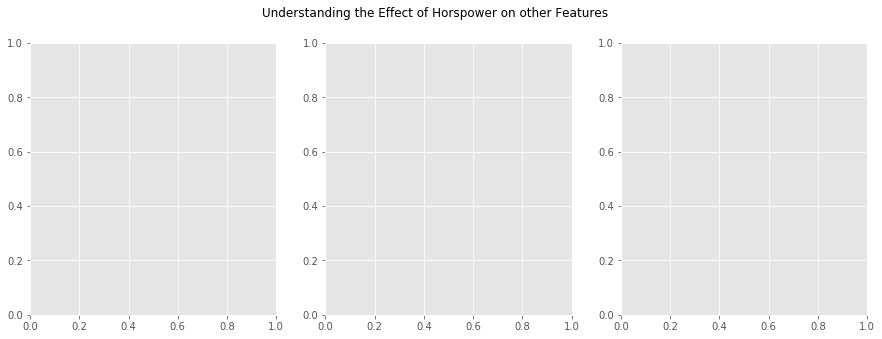

In [3]:
#Create figure and get the axes
fig , (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3, figsize = (15,5))

#Add title for entire figure
fig.suptitle("Understanding the Effect of Horspower on other Features")


On the first axis I will plot hp versus miles per gallon. Recall the axis method set():

- ax.set(title, xlabel, ylabel):  You can use these arguments given to the set method to add titles and axes lables to a given axis.

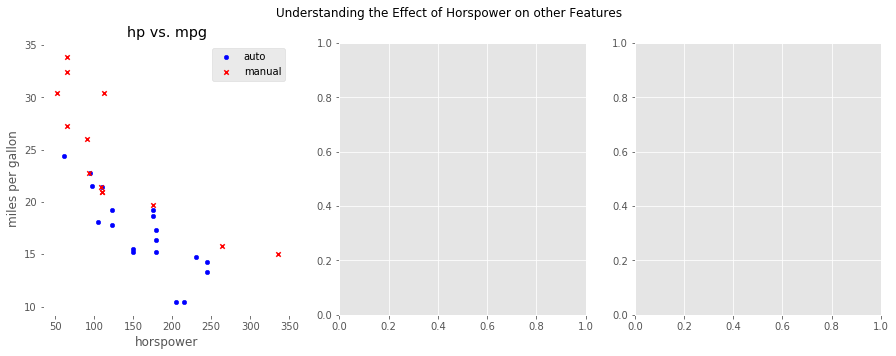

In [4]:
#Plot hp versus mpg for auto
df_cars_auto.plot(kind="scatter", x = "hp", y = "mpg", color = 'b', label = "auto",  ax = ax0 )

#Plot hp versus mpg for manual
df_cars_man.plot(kind="scatter", x = "hp", y = "mpg", color = 'r', marker = "x", label = "manual", ax = ax0 )

#Change axis labels and title
ax0.set(title = "hp vs. mpg", xlabel="horspower", ylabel="miles per gallon")

#Get rid of grid lines
ax0.grid(False)

#Change the background color
ax0.set_facecolor("white")


fig

There were  a couple of new inputs that I used when creating the plot:

- color: changes color of marks.
- marker: style of the mark.
- label: identification for the legend.

I also introduced some new axes method:

- ax.grid(False): Removes the horizontal an vertical lines that create a grid on top of the plot.
- ax.set_facecolor("color"): Changes background color of the plot.

Also, note that I can plot two different plot on the same axes simply by specifying the same axes with the ax input when I create the plots.

Now, let's create the other two plots on the remaining two axes.


In [6]:
#Plot hp versus displacement for auto
df_cars_auto.plot(kind="scatter", x = "hp", y = "disp", color = 'b', label = "auto",  ax = ax1 )

#Plot hp versus mpg for manual
df_cars_man.plot(kind="scatter", x = "hp", y = "disp", color = 'r', marker = "x", label = "manual", ax = ax1)

#Change axis labels and title
ax1.set(title = "hp vs. disp", xlabel="horspower", ylabel="dispersion (cu. in.)")

#Plot hp versus quater mile time for auto
df_cars_auto.plot(kind="scatter", x = "hp", y = "qsec", color = 'b', label = "auto",  ax = ax2, )

#Plot hp versus mpg for manual
df_cars_man.plot(kind="scatter", x = "hp", y = "qsec", color = 'r', marker = "x", label = "manual", ax = ax2)

#Change axis labels and title
ax2.set(title = "hp vs. qsec", xlabel="horspower", ylabel="1/4 mile time (sec)")

[Text(607.8985294117648, 0.5, '1/4 mile time (sec)'),
 Text(0.5, 20.200000000000003, 'horspower'),
 Text(0.5, 1.0, 'hp vs. qsec')]

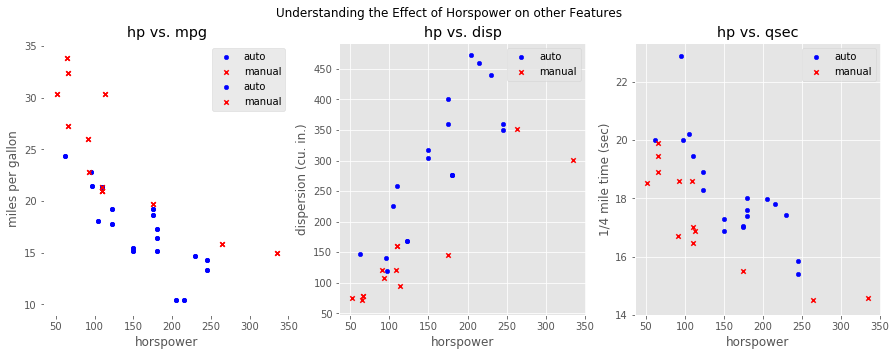

In [7]:
#Let's look at the current figure
fig

We'll finish by adding two horizontal lines to the first plot denoting the respective average mpg for automatic and manual cars respectively.

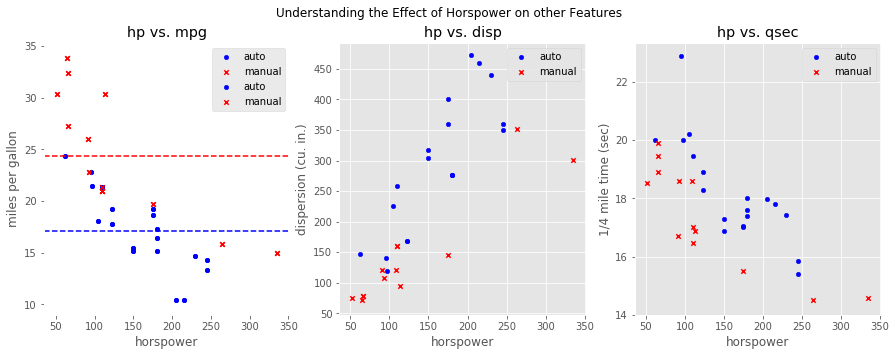

In [8]:
#Compute the two means
mean_mpg_auto = df_cars_auto.mpg.mean()
mean_mpg_man = df_cars_man.mpg.mean()

#Draw the two lines
ax0.axhline(mean_mpg_auto, color = "b", linestyle = "--")
ax0.axhline(mean_mpg_man, color = "r", linestyle = "--")

fig

We can save the figure as follows.  The bbox_inches = "tight" will eliminate the white space around the saved image.

In [9]:
#Saving the figure to png
fig.savefig("carplots.png", bbox_inches = "tight")